# 1. ResolutionFailure: Your dependencies could not be resolved

Найдите python пакет, имеющий зависимость от любого python пакета, использованного вами в первой лабораторной. Создайте свой пакет и установите его с конфликтующими зависимостями

1. Создайте и [загрузите в pypi](https://betterscientificsoftware.github.io/python-for-hpc/tutorials/python-pypi-packaging/) свой пакет, проверьте, что его можно установить через pip
1. Установите свой пакет с помощью pip
1. Установите свой пакет в любую вируальную среду
1. Продемонстрируйте корректно работающие функции в своём python-пакете

In [3]:
pip install setuptools 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: setuptools in c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages (58.2.0)



from setuptools import setup

setup(
    name='kalinichev_module',
    version='0.1.0',    
    description='A example Python package',
    url='https://github.com/posledniypoet',
    author='Alexandr Kalinichev',
    author_email='kalex01@bk.ru',    
    license='BSD 2-clause',
    packages=['kalinichev_module'],
    install_requires=[
                      'keras',
                      'numpy',
                      'tensorflow==2.6.0',
                      'scipy',
                      'scikit-learn',
                      'pillow',
                      'h5py',
                      'tensorboard~=2.4',
                      'tensorflow-estimator~=2.6',
                      'tensorflow-gpu==2.6.0'
                      ],

    classifiers=[
        'Development Status :: 1 - Planning',
        'Intended Audience :: Science/Research',
        'License :: OSI Approved :: BSD License',  
        'Operating System :: POSIX :: Linux',        
        'Programming Language :: Python :: 2',
        'Programming Language :: Python :: 2.7',
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.4',
        'Programming Language :: Python :: 3.5',
    ],
)  

In [2]:
import kalinichev_module 

kalinichev_module.__author__

'Alexander Kalinichev'

In [3]:
kalinichev_module.__version__

'0.1.0'

In [4]:
kalinichev_module.__credits__

'ITMO University'

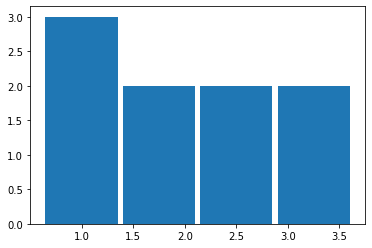

In [5]:
import kalinichev_module.module_fast_hist as module
array = [1,1,2,3,4,1,2,3,4]

module.to_graph(array)

In [8]:
pip install twine

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install kalinichev_module 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kalinichev_module 

kalinichev_module.__author__

'Alexander Kalinichev'

https://github.com/Zyxelo/GraphEnhancedMachineLearningForFraud# 2. Да кто так пишет?!

Возьмите произвольный дипломный проект по машинному обучению. Для этого скорее всего будет достаточно найти на github проекты по запросу "machine learning thesis" и профильтровать по языку "Jupyter Notebook". С большой вероятностью код случайно выбранного диплома в этой сфере будет ужасным. Приведите код в порядок:

- вынесите занимающий место функционал в python модули
- напишите аннотации типов для функций
- добавьте конфиги для параметров
- если это не требует углубления в логику дипломной работы, расставьте порядок запуска ноутбуков и/или скриптов
- для случайных процессов зафиксируйте seed
- выделите зависимости, создайте pipenv файлы
- сделайте пулреквест автору: покажите своё культурное превосходство


Выберите такой проект, который:
- ещё не был выбран вашими одногруппниками
- относительно небольшой по количеству файлов. Не стоит тратить много времени на это задание
- содержит как минимум половину грехов из списка исправлений выше

https://github.com/Zyxelo/GraphEnhancedMachineLearningForFraud

In [ ]:
Для начала создам yaml файл и буду подгружать оттуда какие-то нужные мне константы

In [15]:
import yaml 

with open('./consts.yaml') as f:
    templates = yaml.safe_load(f)

print(templates)

{'path_to_table': ['/Users/victorode/Developer/Python/Neo4j/Neo4jProject/Fraud Detection Model/data/bs140513_032310.csv'], 'labels': ['step', 'customer', 'age', 'gender'], 'seed': 10}


Также добавлю config.ini файл

Также выделил часть кода в модули для простого импорта.Например,draw,py.

In [ ]:
from typing import Any
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier


def draw_func(clf_enh: RandomForestClassifier, features_enhanced: DataFrame, X_train_enh: Any):
    matplotlib.rcParams.update({'font.size': 22})
    importances = clf_enh.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(24, 5))
    plt.xlabel("Feature Name", fontsize=30)
    plt.ylabel("Importance ", fontsize=30)
    plt.bar(range(5), importances[indices[0:5]],
            color="r", align="center")
    plt.xticks(range(5), features_enhanced.columns[indices[0:5]].get_values())
    plt.xlim([-1, 5])
    plt.show()

    plt.figure(figsize=(24, 5))
    plt.xlabel("Feature", fontsize=30)
    plt.ylabel("Importance", fontsize=30)
    plt.plot(range(X_train_enh.shape[1]), importances[indices],
             color="r")

    plt.xlim([-1, X_train_enh.shape[1]])
    plt.show()

In [ ]:
Везде также отмечены типа поступаемых данных

Также отдельно нужно выделить файл tests.py для тестов.

In [ ]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data: list, confidence: float = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h


def run_test(training_results_lists: dict[str, list]):
    tests = ['f1', 'TP', 'TN', 'FP', 'FN']

    for test in tests:
        mean, lower, upper = mean_confidence_interval(
            training_results_lists['{}_enh'.format(test)] - training_results_lists['{}_std'.format(test)],
            confidence=0.99)
        print("Test {},  lower: {}, mean:{} upper: {}".format(test, lower, mean, upper))

In [ ]:
Ещё создал pipenv файлы.

pipenv install numpy
pipenv install pandas
pipenv install matplotlib

# 3. Press Shift+Enter to get 300k/sec salary

Выберите произвольный Google Colab notebook из этого крутого [репозитория](https://github.com/amrzv/awesome-colab-notebooks), запустите и примените к своим данным

https://colab.research.google.com/drive/1MEWKbm-driRNF8PrU7ogS5o3se-ePyPb